<h1 align="center"> Trabalho II - Inteligência de Negócios </h1>

<h3 align="center"> Integrantes: Camila Moser, Júlia Dorneles, Lucas Freitas e Tamires Domingues </h3>

<h1 align="center"> Descrição Geral do Trabalho </h1>

<p align="center"> Este trabalho tem como objetivo prever a expectativa de vida baseada nos dados disponibilizados pela Global Health Observatory (GHO), sob a Organização Mundial de Saúde (OMS), a base de dados foi coletada no site Kaggle, disponível neste link <a href="https://www.kaggle.com/kumarajarshi/life-expectancy-who">aqui</a>.</p> 
<p align="center">Foi observado que, nos últimos 15 anos, tem havido um enorme desenvolvimento no setor da saúde, resultando na melhoria das taxas de mortalidade humana especialmente nos países em desenvolvimento, em comparação com os últimos 30 anos. Portanto neste trabalho, pretendemos prever os dados dos anos de 2000 a 2015 para 193 países para análise posterior. As variáveis preditivas estão divididas em várias categorias amplas como fatores relacionados à imunização, fatores de mortalidade, fatores econômicos e fatores sociais.</p>
<p> O que pretendemos prever na nossa base de dados é a expectativa de vida baseado em dados anteriores, categorizadas como: <font color="blue">muito baixa, baixa, média e alta</font>. Nos próximos passos iremos detalhar cada etapa da preparação dos dados, a escolha dos modelos de aprendizagem supervisionada, a comparação entre os resultados dos modelos e a aplicação das técnicas de avaliação de aprendizagem.</p>


<h3> Importação das bibliotecas em python </h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz 
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
%matplotlib inline


<h3>Descrição geral das variáveis</h3>

| Variável | Descrição |
| --- | --- |
| País | 193 - Países |
| Continentes | América do Sul, América do Norte, Europa, África, Ásia, Oceania |
| Ano | Anos 2000 - 2015 |
| Status | Desenvolvido e em desenvolvimento |
| Expectativa de vida | Expectativa de vida em idade, será transformado em categórico (Classificação) |
| Mortalidade Adulta | Taxa de mortalidade de adultos de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes) |
| Mortes infantis | Número de Mortes Infantis por 1000 habitantes |
| Álcool | Álcool, consumo per capita (15+) registrado (em litros de álcool puro) Porcentagem de gasto |
| Porcentagem de gasto | Despesas com saúde em percentagem do Produto Interno Bruto per capita (%) |
| Hepatite B | Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%) |
| Sarampo | Sarampo - número de casos notificados por mil habitantes |
| BMI | Índice de massa corporal médio da população total |
| Mortes abaixo dos cinco anos | Número de mortes abaixo de cinco por mil habitantes |
| Despesa total | Despesa das administrações públicas em saúde como percentagem da despesa total do governo (%) de 1 ano (%) |
| Difteria | Cobertura de imunização contra toxóide tetânico da difteria e coqueluche (DTP3) em crianças de 1 ano de idade (%) |
| HIV/AIDS  | Mortes por 1.000 nascidos vivos VIH / SIDA (0-4 anos) |
| GDP | Produto Interno Bruto per capita (em USD) |
| População | População de um país |
| Magreza entre adolescentes entre 10 e 19 anos | Prevalência de magreza entre crianças e adolescentes entre 10 e 19 anos (%) |
| Magreza entre crianças entre 5 e 9 anos | Prevalência de magreza entre crianças de 5 a 9 anos (%) |
| Composição de renda dos recursos | Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1) |
| Escolaridade | Número de anos de escolaridade (anos) |

<p> A base de dados foi coletada no site <a href="https://www.kaggle.com"> Kaggle</a>, disponível neste <a href="https://www.kaggle.com/kumarajarshi/life-expectancy-who"> link</a> em formato csv </p>

In [2]:
df = pd.read_csv('Life-Expectancy-Data.csv')

<p> Na tabela gerada abaixo é possível visualizar os 5 primeiros registros do arquivo csv </p>

In [3]:
df.head()

,pais,continente,ano,status,expectativa_vida,mortalidade_adulta,mortes_infantis,alcool,porcentagem_gasto,hepatiteB,...,poliomielite,despesa_total,difteria,hiv/aids,GDP,populacao,magreza_10_19_idade,magreza_5_9_idade,composicao_renda_recurso,escolaridade
0,Afghanistan,Ásia,2015,Em Desenvolvimento,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,479.00,10.1
1,Afghanistan,Ásia,2014,Em Desenvolvimento,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,476.00,10.0
2,Afghanistan,Ásia,2013,Em Desenvolvimento,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,Ásia,2012,Em Desenvolvimento,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669959.000000,3696958.0,17.9,18.0,463.00,9.8
4,Afghanistan,Ásia,2011,Em Desenvolvimento,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,454.00,9.5


<p> Esta base dados possui 2938 registros (linhas) e 23 atributos (colunas) </p>

In [4]:
np.shape(df)

(2938, 23)

<p> Nesta base de dados é possível visualizar a informação da quantidade total de registros preenchidos em cada atributo e seu tipo.</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
pais                        2938 non-null object
continente                  2938 non-null object
ano                         2938 non-null int64
status                      2938 non-null object
expectativa_vida            2928 non-null float64
mortalidade_adulta          2928 non-null float64
mortes_infantis             2938 non-null int64
alcool                      2744 non-null float64
porcentagem_gasto           2938 non-null float64
hepatiteB                   2385 non-null float64
sarampo                     2938 non-null int64
BMI                         2904 non-null float64
mortes_abaixo_5_anos        2938 non-null int64
poliomielite                2919 non-null float64
despesa_total               2712 non-null float64
difteria                    2919 non-null float64
hiv/aids                    2938 non-null float64
GDP                         2490 non-null float64
popu

 <p> Abaixo é possível visualizar a soma total de cada atributo onde seu registro não foi preenchido. </p>

In [6]:
df.isnull().sum()

pais                          0
continente                    0
ano                           0
status                        0
expectativa_vida             10
mortalidade_adulta           10
mortes_infantis               0
alcool                      194
porcentagem_gasto             0
hepatiteB                   553
sarampo                       0
BMI                          34
mortes_abaixo_5_anos          0
poliomielite                 19
despesa_total               226
difteria                     19
hiv/aids                      0
GDP                         448
populacao                   652
magreza_10_19_idade          34
magreza_5_9_idade            34
composicao_renda_recurso    167
escolaridade                163
dtype: int64

<h1 align="center"> Análise e pré-processamento dos dados </h1>

<p> Após descobrirmos qual tipo cada atributo pertence (numérico ou categórico), e se há valores ausentes. Começamos a utilizar as técnicas de pré-processamento para normalizar os dados. </p>

<p> Para a coluna alvo 'expectativa de vida' em que seus valores estiverem ausentes, optamos por remover toda linha deste registro. </p>

In [7]:
df = df[np.isfinite(df['expectativa_vida'])]

<p> Os atributos numéricos que seu valor estiver ausente, optamos por preencher com a média total dos valores deste atributo que foram preenchidos. </p>

In [8]:
alcool_mean = df['alcool'].mean()
hepatiteB_mean = df['hepatiteB'].mean()
BMI_mean = df['BMI'].mean()
poliomielite_mean = df['poliomielite'].mean()
despesa_total_mean = df['despesa_total'].mean()
difteria_mean = df['difteria'].mean()
GDP_mean = df['GDP'].mean()
populacao_mean = df['populacao'].mean()
magreza_10_19_idade_mean = df['magreza_10_19_idade'].mean()
magreza_5_9_idade_mean = df['magreza_5_9_idade'].mean()
composicao_renda_recurso_mean = df['composicao_renda_recurso'].mean()
escolaridade_mean = df['escolaridade'].mean()

df['alcool'].fillna(alcool_mean, inplace=True)
df['hepatiteB'].fillna(hepatiteB_mean, inplace=True)
df['BMI'].fillna(BMI_mean, inplace=True)
df['poliomielite'].fillna(poliomielite_mean, inplace=True)
df['despesa_total'].fillna(despesa_total_mean, inplace=True)
df['difteria'].fillna(difteria_mean, inplace=True)
df['GDP'].fillna(GDP_mean, inplace=True)
df['populacao'].fillna(populacao_mean, inplace=True)
df['magreza_10_19_idade'].fillna(magreza_10_19_idade_mean, inplace=True)
df['magreza_5_9_idade'].fillna(magreza_5_9_idade_mean, inplace=True)
df['composicao_renda_recurso'].fillna(composicao_renda_recurso_mean, inplace=True)
df['escolaridade'].fillna(escolaridade_mean, inplace=True)


<p> Decidimos por criar o atributo "continente" baseada nas informações do atributo "país" após isso decidimos remover o atributo "país" e utilizar o atributo "continente". Caso aplicássemos a técnica de normalização "one hot encoding" nos valores do atributo "país", teriámos que criar a mais 193 atributos (193 países), isso iria ocasionar o problema de alta dimensionalidade (aumento da complexidade do processamento) </p>

In [9]:
df.drop(labels='pais', axis=1, inplace=True)

<p> Decidimos também por remover o atributo 'mortes_abaixo_5_anos, pois possui ambiguidade com o atributo 'mortes_infantis' </p>

In [10]:
df.drop(labels='mortes_abaixo_5_anos', axis=1, inplace=True)

<p> Separamos todos nosso conjunto de dados em <font color="blue">categóricos</font>, <font color="blue">numéricos</font> e <font color="blue">alvo</font> para realizar a análise e a preparação dos dados para cada tipo de atributo.</p>

In [11]:
categoricos = ['continente', 'status']
numericos = [  
    'ano',
    'mortalidade_adulta',
    'mortes_infantis',
    'alcool',
    'porcentagem_gasto',
    'hepatiteB',
    'sarampo',
    'BMI',    
    'poliomielite',
    'despesa_total',
    'difteria',
    'hiv/aids',
    'GDP',
    'populacao',
    'magreza_10_19_idade',
    'magreza_5_9_idade',
    'composicao_renda_recurso',
    'escolaridade'
]
alvo = 'expectativa_vida'

<p> Dados do tipo numéricos </p>

In [12]:
X = df[numericos]
X.head()

,ano,mortalidade_adulta,mortes_infantis,alcool,porcentagem_gasto,hepatiteB,sarampo,BMI,poliomielite,despesa_total,difteria,hiv/aids,GDP,populacao,magreza_10_19_idade,magreza_5_9_idade,composicao_renda_recurso,escolaridade
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,479.00,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,476.00,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669959.000000,3696958.0,17.9,18.0,463.00,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,454.00,9.5


<p> Dados do tipo categórico </p>

In [13]:
df[categoricos].head()

,continente,status
0,Ásia,Em Desenvolvimento
1,Ásia,Em Desenvolvimento
2,Ásia,Em Desenvolvimento
3,Ásia,Em Desenvolvimento
4,Ásia,Em Desenvolvimento


<h2 align="center"> Análise e Descoberta de Conhecimento </h2>

<p> Nesta etapa é realizada a análise dos valores do nosso conjunto de dados, a partir desta análise é possível descobrir correlação entre valores dos diferentes atributos através de percentuais, indíces e gráficos. </p>
<p> Na tabela abaixo é possivel visualizar uma representação da nossa base de dados com informações relevantes para
 análise dos atributos. Entre as informações contidas nessa representação estão a média dos valores, o desvio padrão,
o valor mínimo e máximo e percentual </p>

<p> A partir desta análise observamos que a idade mínima e máxima registrada na coluna "expectativa_vida" da nossa base de dados é de 36,3 e 89 anos de idade respectivamente e a média de idade 69 anos. Estas descobertas foram importantes pois elas influenciaram na decisão da discretização dos valores da coluna "expectativa_vida" em intervalos categorizados em <font color="blue">muito baixa</font>, <font color="blue">baixa</font>, <font color="blue">média</font> e <font color="blue">alta</font> </p>

In [14]:
df.describe()

,ano,expectativa_vida,mortalidade_adulta,mortes_infantis,alcool,porcentagem_gasto,hepatiteB,sarampo,BMI,poliomielite,despesa_total,difteria,hiv/aids,GDP,populacao,magreza_10_19_idade,magreza_5_9_idade,composicao_renda_recurso,escolaridade
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,4.241517e+03,80.960842,2427.855874,38.235394,82.548298,5.930163,82.321416,1.747712,5.525980e+05,1.276454e+07,4.850622,4.881423,563.938183,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.914923,1.896396e+05,22.531361,11485.970937,19.850184,23.340548,2.385478,23.629576,5.085542,4.674771e+06,5.390628e+07,4.396597,4.484890,266.089648,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000e+00,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350e+00,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964e+00,80.960842,0.000000,19.400000,78.000000,4.370000,78.000000,0.100000,5.866638e+02,4.181205e+05,1.600000,1.600000,451.000000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,6.561145e+01,87.000000,17.000000,43.000000,93.000000,5.930163,93.000000,0.100000,3.220030e+03,3.640009e+06,3.400000,3.400000,625.500000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,4.426143e+02,96.000000,362.250000,56.100000,97.000000,7.330000,97.000000,0.800000,2.498385e+04,1.276454e+07,7.100000,7.200000,755.000000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,1.026176e+07,99.000000,212183.000000,77.600000,99.000000,17.600000,99.000000,50.600000,1.157616e+08,1.293859e+09,27.700000,28.600000,948.000000,20.700000


<h3> Correlação (de Pearson) </h3>

<p> A correlação indica a força e a direção de um relacionamento linear entre 2 variáveis, ela varia entre [-1, 1] onde as extremidades indicam um relacionamento linear perfeito, onde 1 (positivo perfeito) e -1 (negativo perfeito) e 0 significa que não existe relacionamento linear entre duas variáveis </p>
<p> A seguir é apresentado uma matriz de correlação com os atributos e seus relacionamentos, cada relacionamento é representado por uma escala de cor verde, onde quanto mais escuro maior é a correlação entre dois atributos.</p>

In [15]:
corr = df[numericos + [alvo]].corr()
cm = sn.light_palette("green", as_cmap=True)

s = corr.style.background_gradient(cmap=cm)
s

,ano,mortalidade_adulta,mortes_infantis,alcool,porcentagem_gasto,hepatiteB,sarampo,BMI,poliomielite,despesa_total,difteria,hiv/aids,GDP,populacao,magreza_10_19_idade,magreza_5_9_idade,composicao_renda_recurso,escolaridade,expectativa_vida
ano,1,-0.0790516,-0.036464,-0.0446691,0.0223751,0.0907393,-0.0818403,0.104094,0.0941583,0.0786788,0.134333,-0.138789,0.0472139,0.0151803,-0.0448354,-0.0478884,0.165056,0.207357,0.170033
mortalidade_adulta,-0.0790516,1,0.078756,-0.190791,-0.0158926,-0.139146,0.0311764,-0.383641,-0.273295,-0.111772,-0.273602,0.523821,-0.0678193,-0.0125087,0.300262,0.305767,-0.306614,-0.437255,-0.696359
mortes_infantis,-0.036464,0.078756,1,-0.114806,-0.00565647,-0.179724,0.501038,-0.227427,-0.171049,-0.126769,-0.175524,0.0249547,-0.0254549,0.548547,0.46559,0.471229,-0.098908,-0.193232,-0.196557
alcool,-0.0446691,-0.190791,-0.114806,1,0.0266095,0.0742453,-0.0517864,0.325939,0.214038,0.300901,0.215578,-0.0497192,0.0858793,-0.0309342,-0.420607,-0.409477,0.266591,0.498167,0.39242
porcentagem_gasto,0.0223751,-0.0158926,-0.00565647,0.0266095,1,0.000125855,-0.00447313,0.020907,0.010611,0.0430264,0.0106393,-0.0070151,0.000911333,-0.00270886,-0.0184032,-0.0190595,0.0276139,0.0421261,0.0268432
hepatiteB,0.0907393,-0.139146,-0.179724,0.0742453,0.000125855,1,-0.0908265,0.139102,0.406308,0.0608391,0.498359,-0.103061,0.0257206,-0.110472,-0.106911,-0.110112,0.0982448,0.165083,0.204566
sarampo,-0.0818403,0.0311764,0.501038,-0.0517864,-0.00447313,-0.0908265,1,-0.176019,-0.13644,-0.10473,-0.142154,0.0306734,-0.0129642,0.236236,0.224516,0.220774,-0.0840559,-0.123611,-0.157586
BMI,0.104094,-0.383641,-0.227427,0.325939,0.020907,0.139102,-0.176019,1,0.285168,0.228134,0.283995,-0.243575,0.0810642,-0.0632355,-0.530805,-0.537784,0.312158,0.519223,0.562453
poliomielite,0.0941583,-0.273295,-0.171049,0.214038,0.010611,0.406308,-0.13644,0.285168,1,0.136556,0.67213,-0.159843,0.0478125,-0.0351476,-0.22092,-0.221702,0.234418,0.384386,0.462592
despesa_total,0.0786788,-0.111772,-0.126769,0.300901,0.0430264,0.0608391,-0.10473,0.228134,0.136556,1,0.152079,-0.000338931,0.0511975,-0.0667506,-0.267693,-0.274276,0.0969488,0.232252,0.209628


<p> Ao analisar a matriz de correlação, foi possível descobrir conhecimentos intríseco nos dados, como por exemplo: quanto maior a escolaridade, maior a expectativa de vida (correlaçao linear positiva).</p>
<p> Além desta descoberta, também conseguimos notar que quanto maior O IDH (Índice de Desenvolvimento Humano) maior a expectativa de vida e maior a escolaridade. Também foi possível validar algumas correlações evidentes como a relação entre mortalidade adulta com a expectativa de vida.</p>

<p> Abaixo é apresentado os gráficos de correlação linear das análises descritas anteriomente. </p>

Text(0, 0.5, 'Expectativa de vida')

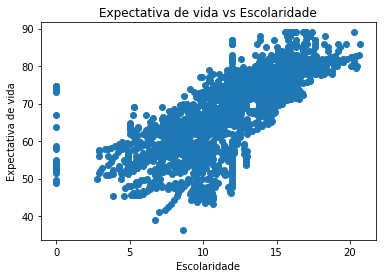

In [16]:
plt.scatter(df['escolaridade'],df['expectativa_vida'])
plt.title("Expectativa de vida vs Escolaridade")
plt.xlabel('Escolaridade')
plt.ylabel('Expectativa de vida')

Text(0, 0.5, 'Expectativa de vida')

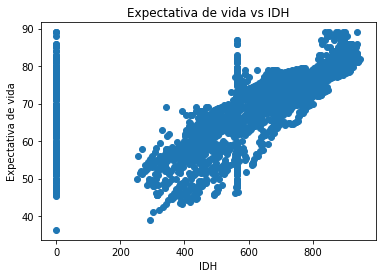

In [17]:
plt.scatter(df['composicao_renda_recurso'],df['expectativa_vida'])
plt.title("Expectativa de vida vs IDH")
plt.xlabel('IDH')
plt.ylabel('Expectativa de vida')

Text(0, 0.5, 'Expectativa de vida')

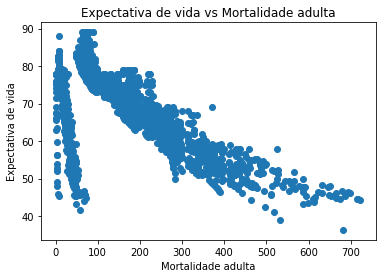

In [18]:
plt.scatter(df['mortalidade_adulta'],df['expectativa_vida'])
plt.title("Expectativa de vida vs Mortalidade adulta")
plt.xlabel('Mortalidade adulta')
plt.ylabel('Expectativa de vida')

<h3> IDH vs Escolaridade </h3>

Text(0, 0.5, 'Escolaridade')

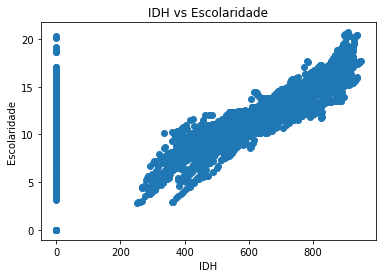

In [19]:
plt.scatter(df['composicao_renda_recurso'],df['escolaridade'])
plt.title("IDH vs Escolaridade")
plt.xlabel('IDH')
plt.ylabel('Escolaridade')

<h3> Discretização do atributo classe "expectativa de vida" </h3>

<p> Como neste trabalho iremos utilizar algoritmos de classificação para prever a coluna "expectativa_vida", se fez  necessário transformar os valores deste atributo numérico na forma de atributos categóricos.
A transformação deste atributo numérico em categórico envolveu duas subtarefas:
<p> Decidir quantas categorias este atributo irá ter, neste passo, após os valores numéricos deste atributo estarem ordenados eles são divididos em <i>n</i> intervalos especificando-se <i>n</i> pontos de divisão, no segundo e trivial  passo, todos os valores de um intervalo são mapeados para o mesmo valor de categoria. Utilizamos 4 categorias divididas em <font color="blue">muito baixa</font> menor ou igual a 50 anos, <font color="blue">baixa</font> maior que 50 e menor ou igual a 60 anos, <font color="blue">média</font> maior que 60 e menor ou igual a 75 anos e <font color="blue">alta</font> maior que 75 anos.</p>

In [20]:
bins = (0, 50, 60, 75, 100)
category_expectiva_vida = ['muito baixa', 'baixa', 'média', 'alta']
df['expectativa_vida'] = pd.cut(df['expectativa_vida'], bins = bins, labels = category_expectiva_vida)
df['expectativa_vida'].unique()

[média, baixa, alta, muito baixa]
Categories (4, object): [muito baixa < baixa < média < alta]

<h3> Distribuição da Expectativa de Vida Global </h3>

<p> O gráfico a seguir apresenta a distribuição total e a porcentagem dos registros em cada categoria, a partir desta análise podemos observar que a expectivativa de vida categorizada como <font color="blue">média</font> possui metade do predomínio do conjunto de dados, e a categoria <font color="blue">muito baixa</font> possui o menor número de registros. </p>

Muito Baixa = 127
Baixa = 467
Média = 1510
Alta = 824
Percentual Muito Baixa:  4.337431693989071 %
Percentual Baixa:  15.949453551912567 %
Percentual Média:  51.57103825136612 %
Percentual Alta:  28.142076502732237 %


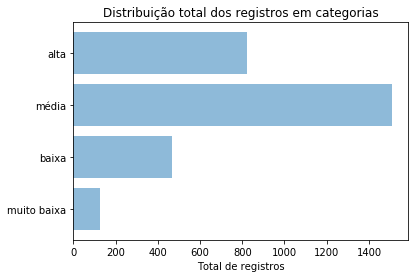

In [21]:
muito_baixa = (df['expectativa_vida'] == 'muito baixa').sum()
baixa = (df['expectativa_vida'] == 'baixa').sum()
media = (df['expectativa_vida'] == 'média').sum()
alta = (df['expectativa_vida'] == 'alta').sum()

total = muito_baixa + baixa + media + alta
percent_muito_baixa = muito_baixa/total
percent_baixa = baixa/total
percent_media =  media/total
percent_alta =  alta/total

print('Muito Baixa =', muito_baixa)
print('Baixa =', baixa)
print('Média =', media)
print('Alta =', alta)
print('Percentual Muito Baixa: ', percent_muito_baixa * 100, '%')
print('Percentual Baixa: ', percent_baixa * 100, '%')
print('Percentual Média: ', percent_media * 100, '%')
print('Percentual Alta: ', percent_alta * 100, '%')

objects = ('muito baixa', 'baixa', 'média', 'alta')
y_pos = np.arange(len(objects))
performance = [muito_baixa, baixa, media, alta]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Total de registros')
plt.title('Distribuição total dos registros em categorias')

plt.show()

<h3> Distribuição da expectativa de vida por continentes </h3>

<p> No gráfico a seguir é possível analisar com maior detalhamento a distribuição dos registros em gráficos de barras com valores de 0 a 100, onde cada barra representa um continente, cada barra é dividida em cores que representam as categorias do atributo alvo expectativa de vida. Neste gráfico é possível observar que a expectativa de vida <font color="blue">média</font> é predominante nos continentes: América do Norte, América do Sul, Oceania e Ásia.</p>
<p> Os continentes Europa e África foram os únicos que não tiveram expectativa de vida média como predominantes, a Europa teve maior número de registros classificados como Alta, a Áfria teve mais registros classificados como baixa, sendo o único continente com registros classificados como muito baixa. </p>

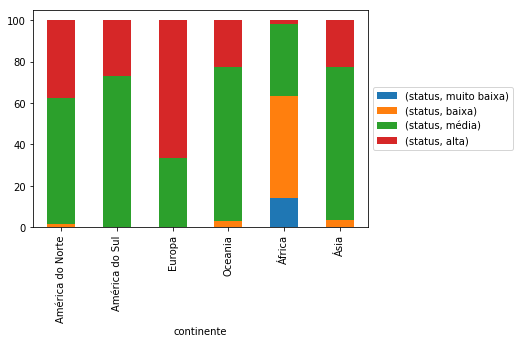

In [22]:
x_chart = df.pivot_table(values=['status'], index=['continente'], columns=['expectativa_vida'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<h1 align="center"> Transformação dos Dados </h1>

<p> A etapa de preparação dos dados tem por objetivo converter os valores dos atributos categóricos em valores numéricos, normalizá-los e re-escalar. Esta etapa é necessária para os algoritmos de classificação que trabalham apenas com variáveis númericas. A conversão dos atributos nominais podem ser feitas por meio de <b>binarização</b> e <b>codificação 1-de-n<b> <i>(one-hot-enconding)</i></p>

In [23]:
df['mortes_infantis'] = df['mortes_infantis'].astype(float)
df['sarampo'] = df['sarampo'].astype(float)

<h3> Re-escalar valores dos atributos numéricos </h3>

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\lukzf\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lukzf\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
X

array([[ 1.62697843,  0.79023802,  0.26751977, ...,  2.76945433,
        -0.31926342, -0.58394089],
       [ 1.41004798,  0.85461353,  0.2844554 , ...,  2.81405613,
        -0.33053974, -0.61468047],
       [ 1.19311752,  0.83047271,  0.30139102, ...,  2.85865792,
        -2.11794947, -0.64542005],
       ...,
       [-1.19311752, -0.73868044, -0.04578922, ..., -0.79868943,
        -0.51471966, -0.61468047],
       [-1.41004798,  4.19409332, -0.04578922, ..., -0.70948584,
        -0.51471966, -0.67615962],
       [-1.62697843,  4.02510759, -0.05425703, ...,  1.40909952,
        -0.48840824, -0.67615962]])

<h3> Normalização do atributo 'continente' utilizando a codificação 1-de-n (<i>one-hot encoding</i>) </h3>

In [26]:
lb_continente = LabelBinarizer()
continente = lb_continente.fit_transform(df['continente'].values)
print("Classes aprendidas: ",lb_continente.classes_)
print("Dados: ", continente)
X = np.c_[X, continente ]
X
numericos = np.append(numericos,lb_continente.classes_)
numericos

Classes aprendidas:  ['América do Norte' 'América do Sul' 'Europa' 'Oceania' 'África' 'Ásia']
Dados:  [[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 ...
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


array(['ano', 'mortalidade_adulta', 'mortes_infantis', 'alcool',
       'porcentagem_gasto', 'hepatiteB', 'sarampo', 'BMI', 'poliomielite',
       'despesa_total', 'difteria', 'hiv/aids', 'GDP', 'populacao',
       'magreza_10_19_idade', 'magreza_5_9_idade',
       'composicao_renda_recurso', 'escolaridade', 'América do Norte',
       'América do Sul', 'Europa', 'Oceania', 'África', 'Ásia'],
      dtype='<U24')

<h3> Normalização do atributo 'status' utilizando a codificação 1-de-n (<i>one-hot encoding</i>) </h3>

In [27]:
lb_status = LabelBinarizer()
status = lb_status.fit_transform(df['status'].values)
print("Classes aprendidas: ",lb_status.classes_)
print("Dados: ", status)
X = np.c_[X, status ]
X
numericos = np.append(numericos,lb_status.classes_)
numericos

Classes aprendidas:  ['Desenvolvido' 'Em Desenvolvimento']
Dados:  [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


array(['ano', 'mortalidade_adulta', 'mortes_infantis', 'alcool',
       'porcentagem_gasto', 'hepatiteB', 'sarampo', 'BMI', 'poliomielite',
       'despesa_total', 'difteria', 'hiv/aids', 'GDP', 'populacao',
       'magreza_10_19_idade', 'magreza_5_9_idade',
       'composicao_renda_recurso', 'escolaridade', 'América do Norte',
       'América do Sul', 'Europa', 'Oceania', 'África', 'Ásia',
       'Desenvolvido', 'Em Desenvolvimento'], dtype='<U24')

<h3> O número de colunas após a normalização dos dados utilizando <i>one-hot enconding</i> </h3>

In [28]:
np.shape(X)

(2928, 25)

<h1 align="center"> Avaliação de Desempenho dos Classificadores </h1>

<p> Calcular o desempenho preditivo em termos de taxa de acerto ou de erro utilizando a mesma base de dados acaba ocasionando modelos viciados chamados de <i>overfitting</i>, devem-se então utilizar métodos de amostragem alternativos para obter estimativas de desempenho preditivo mais confiáveis, definindo conjuntos de treino e teste. Os dados de treinamento são empregados na indução e no ajuste do modelo, enquanto os exemplos de testes simulam a apresentação de objetos novos ao preditor, os quais não foram vistos antes em sua indução.</p>
<p> Dois dos principais métodos de amostragem existentes foram utilizados neste trabalho, <i>Holdout</i> e Validação Cruzada (<i>cross validation</i>) </p>

<p> Atribuir a variável 'y' a classe alvo 'expectativa_vida' </p>

In [29]:
y = df['expectativa_vida']

In [30]:
y.head()

0    média
1    baixa
2    baixa
3    baixa
4    baixa
Name: expectativa_vida, dtype: category
Categories (4, object): [muito baixa < baixa < média < alta]

<h3> Método Hold Out </h3>

<p> Neste método, os dados são divididos em dois conjuntos disjuntos, chamados de treinamento e teste, um modelo de classificação é então induzido a partir do conjunto de treinamento e seu desempenho é avaliada no conjunto de teste. A proporção dos dados reservados para treinamento geralmente fica em 2/3 e para teste 1/3. O modelo <i>holdout</i> possui diversas limitações pois devido aos conjuntos de treinamento e teste serem suconjuntos de dados originais, uma classe que esteja representada em excesso em um subconjunto estará representada de menos na outra e vice-versa.</p>
<p> A solução que utilizamos poderá mitigar este problema é crar sbuconjuntos de treinamento e teste de registros aleatoriamente (random_state=42) como o exemplo a seguir. Separando o treinamento (X_train) em 70% (2049 registros), e 30% para o subconjunto teste (X_test) (879 registros) a separação dos registros.</p>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X_train.shape

(2049, 25)

In [33]:
X_test.shape

(879, 25)

<h3> Método Validação Cruzada (<i>Cross Validation</i>)

<p> Outra alteranativa é o uso do método validação cruzada, neste trabalho utilizaremos <i>k</i> partições de tamanhos iguais, durante cada execução, uma das partições é escolhida para teste, enquanto outras são usadas para treinamento, este procedimento é repetido <i>k</i> vezes de modo que cada partição seja utilizada para teste exatamente uma vez. A desvantagem desta abordagem que computacionalmente é custuso repetir <i>k</i> vezes este procedimento.</p>

<h1 align="center"> Modelos Preditivos (Classificação) </h1>

<h1 align="center"> K-Nearest Neighbours </h1>

<p> Este algoritmo é o mais simples entre todos os algoritmos de aprendizagem de máquina, possui como parâmetro de entrada o número de vizinhos mais próximos <i>k</i>, definida pelo usuário. Este parâmetro influencia diretamente na taxa de acerto do algoritmo, por exemplo, quando inserimos um valor de <i>k</i> baixo, ele é mais propício a errar a classificação por causa de <i>outliers</i>. Este algoritmo utiliza o método baseado na distância entre dois pontos, geralmente usado pelo cálculo da distância Euclidiana, onde, quanto menor a distância entre dois pontos maior a chance deste ponto fazer parte desta classe.  </p>

<p> Para analisarmos qual melhor valor de <i>k</i> para o algoritmo, fizemos um teste com valores de k entre 1 a 19, apenas com valores ímpares para evitar empates, criamos o modelo preditivo para cada <i>k</i> e aplicamos o conjunto de teste ao modelo, com isso obtemos o resultado da acurácia para cada modelo e aplicamos em um gráfico para analisarmos melhor.</p>

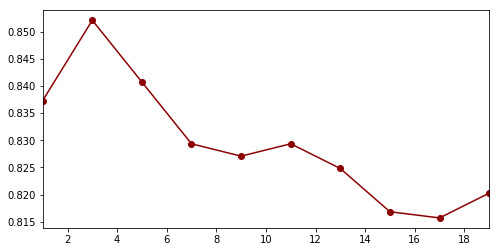

In [34]:
results = []
lista_n = [1,3,5,7,9,11,13,15,17,19]
for n in lista_n:
    modelo_knn = KNeighborsClassifier(n_neighbors=n)
    modelo_knn.fit(X_train,y_train)
    pred_knn = modelo_knn.predict(X_test)    
    accuracy = accuracy_score(y_test,pred_knn)
    results.append(accuracy)    
    
plt.figure(figsize=(8,4))
pd.Series(results, lista_n).plot(color="darkred",marker="o")

<p> Ao Analisarmos o gráfico notamos que <i>k</i> igual a 3 obteve melhor acurácia </p>

<h3> Criando Modelo K-NN </h3>

In [35]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

<h3> Aplicando Modelo de Aprendizagem ao conjunto de teste </h3>

In [36]:
pred_knn = modelo_knn.predict(X_test)

<h3> Medidas de Desempenho </h3>

In [37]:
print('matrix de confusão')
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print('Acurácia', accuracy_score(y_test,pred_knn))
print('Taxa de erro', np.mean(pred_knn != y_test))

matrix de confusão
[[210   0   0  40]
 [  0 133   4  13]
 [  0   8  27   2]
 [ 40  23   0 379]]
              precision    recall  f1-score   support

        alta       0.84      0.84      0.84       250
       baixa       0.81      0.89      0.85       150
 muito baixa       0.87      0.73      0.79        37
       média       0.87      0.86      0.87       442

   micro avg       0.85      0.85      0.85       879
   macro avg       0.85      0.83      0.84       879
weighted avg       0.85      0.85      0.85       879

Acurácia 0.8521046643913538
Taxa de erro 0.14789533560864618


<h3> Cross Validation </h3>

<p> Analisamos através de um gráfico qual o melhor valor de <i>k</i> (vizinhos próximos) com melhor acurácia </p>

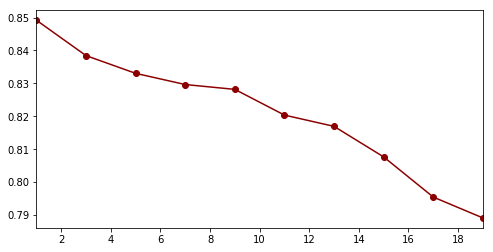

In [38]:
results = []
lista_n = [1,3,5,7,9,11,13,15,17,19]
for n in lista_n:    
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    results.append(scores.mean())        
plt.figure(figsize=(8,4))
pd.Series(results, lista_n).plot(color="darkred",marker="o")

<p> Melhor <i>k</i> encontrado foi igual a 3</p> 

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Scores:", scores)
print("Accuracy: %0.2f Desvio Padrão: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.88807786 0.81995134 0.82195122 0.84596577 0.81617647]
Accuracy: 0.84 Desvio Padrão: (+/- 0.05)


<h1 align="center"> Decision Tree </h1>

<p>O algoritmo <i>Decision Tree</i> ou Árvore de Decisão. Ele utiliza a estratégia de dividir para conquistar para resolver um problema de decisão, este algoritmo geralmente empregam uma estratégia que cresce uma árvore de decisão tomando uma série de decisões localmente ótimas sobre qual atributo usar para particionar os dados. Um desses algoritmos é o algoritmo de <i>Hunt</i>. Em uma árvore de decisão, cada nodo folha recebe um rótulo de classe, os nodos internos e o nodo raiz, contém condições de testes de atributos para separar registros que possuem características diferentes.</p>

<p> Para analisarmos qual melhor valor para o parâmetro de entrada relacionada a profundidade máxima da árvore, fizemos um teste com valores entre 2 a 20, apenas com valores pares, criamos o modelo preditivo para cada profundidade máxima e aplicamos o conjunto de teste ao modelo, com isso obtemos o resultado da acurácia para cada modelo e aplicamos em um gráfico para analisarmos melhor.</p>

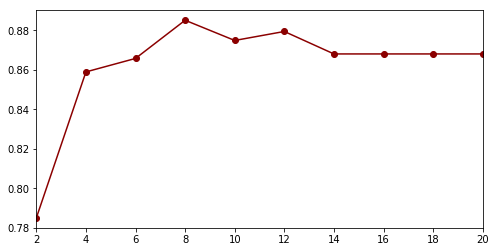

In [40]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    modelo_dtree = DecisionTreeClassifier(max_depth=trees, random_state=101, max_features = None, min_samples_leaf = 4)
    modelo_dtree.fit(X_train, y_train)
    pred_tree = modelo_dtree.predict(X_test)
    accuracy = accuracy_score(y_test,pred_tree)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

<h3> Gerando gráfico com o modelo da árvore de decisão </h3>

In [41]:
feature_names = ['mortalidade_adulta', 'mortes_infantis', 'alcool',
       'porcentagem_gasto', 'hepatiteB', 'sarampo', 'BMI',
       'poliomielite', 'despesa_total', 'difteria', 'hiv/aids', 
       'GDP', 'populacao', 'magreza_10_19_idade', 'magreza_5_9_idade',
       'composicao_renda_recurso', 'escolaridade',       
       'América do Norte', 'América do Sul', 'Europa', 'Oceania',
       'África', 'Ásia', 'Desenvolvido', 'Em Desenvolvimento'];

In [42]:
target_names = ['muito baixa', 'baixa', 'média', 'alta']

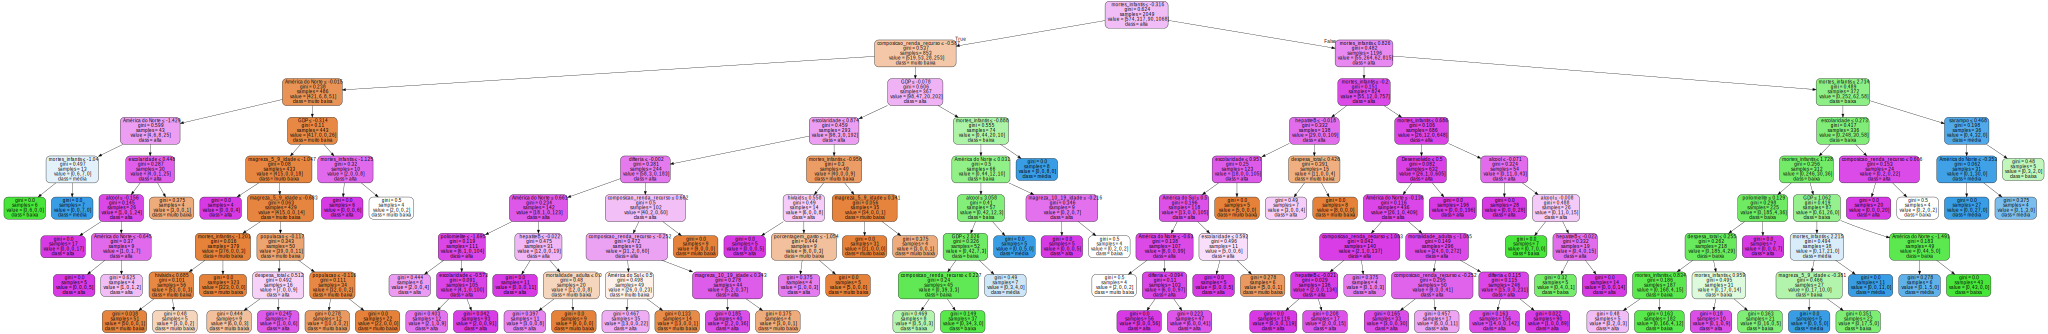

In [43]:
modelo_dtree = DecisionTreeClassifier(max_depth=8, random_state=101, max_features = None, min_samples_leaf = 4)
modelo_dtree = modelo_dtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(modelo_dtree, out_file=None, 
                     feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
# Salvo um arquivo no formato pdf 
graph.render("modelo_arvore_decisao") 
# Exibe o gráfico da árvore gerada
graph

<h3> Aplicando modelo de aprendizagem ao conjunto de teste </h3>

In [44]:
pred_dtree = modelo_dtree.predict(X_test)

<h3> Medidas de Desempenho </h3>

In [45]:
print('matrix de confusão')
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))
print('Acurácia', accuracy_score(y_test,pred_dtree))
print('Taxa de erro', np.mean(pred_dtree != y_test))

matrix de confusão
[[210   0   0  40]
 [  0 135   4  11]
 [  0   9  28   0]
 [ 23  14   0 405]]
              precision    recall  f1-score   support

        alta       0.90      0.84      0.87       250
       baixa       0.85      0.90      0.88       150
 muito baixa       0.88      0.76      0.81        37
       média       0.89      0.92      0.90       442

   micro avg       0.89      0.89      0.89       879
   macro avg       0.88      0.85      0.86       879
weighted avg       0.89      0.89      0.88       879

Acurácia 0.8850967007963595
Taxa de erro 0.1149032992036405


<h3> Cross Validation </h3>

<p> Analisamos através de um gráfico qual o melhor valor da profundida máxima da árvore de decisão para obter uma melhor acurácia </p>

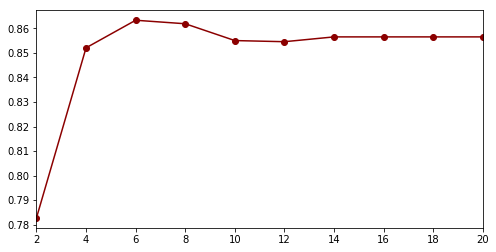

In [46]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    dtree = DecisionTreeClassifier(max_depth=trees, random_state=101, max_features = None, min_samples_leaf = 4)
    scores = cross_val_score(dtree, X_train, y_train, cv=5)
    results.append(scores.mean())
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

<p> O melhor valor de profundidade máxima da árvore encontrado foi igual a 6</p> 

In [56]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=101, max_features = None, min_samples_leaf = 4)
scores = cross_val_score(dtree, X_train, y_train, cv=5)
print("Scores:", scores)
print("Accuracy: %0.2f Desvio Padrão: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.87347932 0.85888078 0.88536585 0.86308068 0.83578431]
Accuracy: 0.86 Desvio Padrão: (+/- 0.03)
